In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor

In [113]:
df = pd.read_csv('Data/Sberbank_Russian_Housing_Market/train.csv')

In [114]:
df.head()

,id,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,...,cafe_count_5000_price_2500,cafe_count_5000_price_4000,cafe_count_5000_price_high,big_church_count_5000,church_count_5000,mosque_count_5000,leisure_count_5000,sport_count_5000,market_count_5000,price_doc
0,1,2011-08-20,43,27.0,4.0,NaN,NaN,NaN,NaN,NaN,...,9,4,0,13,22,1,0,52,4,5850000
1,2,2011-08-23,34,19.0,3.0,NaN,NaN,NaN,NaN,NaN,...,15,3,0,15,29,1,10,66,14,6000000
2,3,2011-08-27,43,29.0,2.0,NaN,NaN,NaN,NaN,NaN,...,10,3,0,11,27,0,4,67,10,5700000
3,4,2011-09-01,89,50.0,9.0,NaN,NaN,NaN,NaN,NaN,...,11,2,1,4,4,0,0,26,3,13100000
4,5,2011-09-05,77,77.0,4.0,NaN,NaN,NaN,NaN,NaN,...,319,108,17,135,236,2,91,195,14,16331452


In [115]:
df.tail()

,id,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,...,cafe_count_5000_price_2500,cafe_count_5000_price_4000,cafe_count_5000_price_high,big_church_count_5000,church_count_5000,mosque_count_5000,leisure_count_5000,sport_count_5000,market_count_5000,price_doc
30466,30469,2015-06-30,44,27.0,7.0,9.0,1.0,1975.0,2.0,6.0,...,15,5,0,15,26,1,2,84,6,7400000
30467,30470,2015-06-30,86,59.0,3.0,9.0,2.0,1935.0,4.0,10.0,...,313,128,24,98,182,1,82,171,15,25000000
30468,30471,2015-06-30,45,NaN,10.0,20.0,1.0,NaN,1.0,1.0,...,1,1,0,2,12,0,1,11,1,6970959
30469,30472,2015-06-30,64,32.0,5.0,15.0,1.0,2003.0,2.0,11.0,...,22,1,1,6,31,1,4,65,7,13500000
30470,30473,2015-06-30,43,28.0,1.0,9.0,1.0,1968.0,2.0,6.0,...,5,2,0,7,16,0,9,54,10,5600000


In [116]:
df.shape

(30471, 292)

In [117]:
max(df.shape[0] - df.count(axis=0))

14441

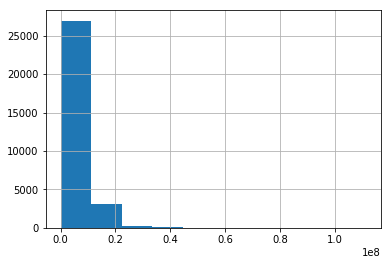

In [118]:
df['price_doc'].hist();

In [119]:
df.describe()

,id,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state,...,cafe_count_5000_price_2500,cafe_count_5000_price_4000,cafe_count_5000_price_high,big_church_count_5000,church_count_5000,mosque_count_5000,leisure_count_5000,sport_count_5000,market_count_5000,price_doc
count,30471.000000,30471.000000,24088.000000,30304.000000,20899.000000,20899.000000,1.686600e+04,20899.000000,20899.000000,16912.000000,...,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000,3.047100e+04
mean,15237.917397,54.214269,34.403271,7.670803,12.558974,1.827121,3.068057e+03,1.909804,6.399301,2.107025,...,32.058318,10.783860,1.771783,15.045552,30.251518,0.442421,8.648814,52.796593,5.987070,7.123035e+06
std,8796.501536,38.031487,52.285733,5.319989,6.756550,1.481154,1.543878e+05,0.851805,28.265979,0.880148,...,73.465611,28.385679,5.418807,29.118668,47.347938,0.609269,20.580741,46.292660,4.889219,4.780111e+06
min,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000e+00,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000e+05
25%,7620.500000,38.000000,20.000000,3.000000,9.000000,1.000000,1.967000e+03,1.000000,1.000000,1.000000,...,2.000000,1.000000,0.000000,2.000000,9.000000,0.000000,0.000000,11.000000,1.000000,4.740002e+06
50%,15238.000000,49.000000,30.000000,6.500000,12.000000,1.000000,1.979000e+03,2.000000,6.000000,2.000000,...,8.000000,2.000000,0.000000,7.000000,16.000000,0.000000,2.000000,48.000000,5.000000,6.274411e+06
75%,22855.500000,63.000000,43.000000,11.000000,17.000000,2.000000,2.005000e+03,2.000000,9.000000,3.000000,...,21.000000,5.000000,1.000000,12.000000,28.000000,1.000000,7.000000,76.000000,10.000000,8.300000e+06
max,30473.000000,5326.000000,7478.000000,77.000000,117.000000,6.000000,2.005201e+07,19.000000,2014.000000,33.000000,...,377.000000,147.000000,30.000000,151.000000,250.000000,2.000000,106.000000,218.000000,21.000000,1.111111e+08


Wall time: 7.13 s


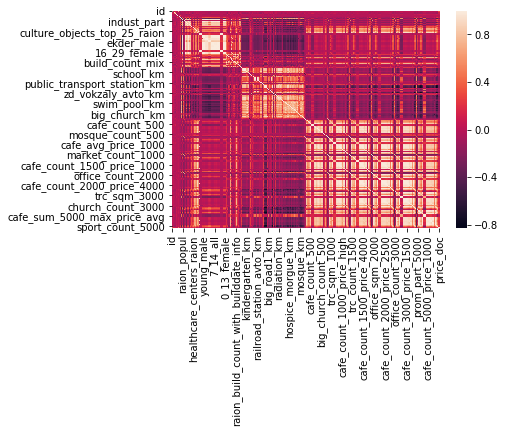

In [120]:
%%time
sns.heatmap(df.corr());

In [121]:
list(df.columns)

['id',
 'timestamp',
 'full_sq',
 'life_sq',
 'floor',
 'max_floor',
 'material',
 'build_year',
 'num_room',
 'kitch_sq',
 'state',
 'product_type',
 'sub_area',
 'area_m',
 'raion_popul',
 'green_zone_part',
 'indust_part',
 'children_preschool',
 'preschool_quota',
 'preschool_education_centers_raion',
 'children_school',
 'school_quota',
 'school_education_centers_raion',
 'school_education_centers_top_20_raion',
 'hospital_beds_raion',
 'healthcare_centers_raion',
 'university_top_20_raion',
 'sport_objects_raion',
 'additional_education_raion',
 'culture_objects_top_25',
 'culture_objects_top_25_raion',
 'shopping_centers_raion',
 'office_raion',
 'thermal_power_plant_raion',
 'incineration_raion',
 'oil_chemistry_raion',
 'radiation_raion',
 'railroad_terminal_raion',
 'big_market_raion',
 'nuclear_reactor_raion',
 'detention_facility_raion',
 'full_all',
 'male_f',
 'female_f',
 'young_all',
 'young_male',
 'young_female',
 'work_all',
 'work_male',
 'work_female',
 'ekder_all'

In [122]:
 dr = ['metro_km_walk',
 'metro_km_avto',
 'railroad_station_walk_km',
 'railroad_station_avto_km',
 'public_transport_station_km',
 'cafe_count_500_na_price',
 'cafe_count_500_price_500',
 'cafe_count_500_price_1000',
 'cafe_count_500_price_1500',
 'cafe_count_500_price_2500',
 'cafe_count_500_price_4000',
 'cafe_count_500_price_high',
 'cafe_sum_1000_max_price_avg',
 'cafe_count_1000_na_price',
 'cafe_count_1000_price_500',
 'cafe_count_1000_price_1000',
 'cafe_count_1000_price_1500',
 'cafe_count_1000_price_2500',
 'cafe_count_1000_price_4000',
 'cafe_count_1000_price_high',
 'cafe_count_1500_na_price',
 'cafe_count_1500_price_500',
 'cafe_count_1500_price_1000',
 'cafe_count_1500_price_1500',
 'cafe_count_1500_price_2500',
 'cafe_count_1500_price_4000',
 'cafe_count_1500_price_high',
 'cafe_count_2000_na_price',
 'cafe_count_2000_price_500',
 'cafe_count_2000_price_1000',
 'cafe_count_2000_price_1500',
 'cafe_count_2000_price_2500',
 'cafe_count_2000_price_4000',
 'cafe_count_2000_price_high',
 'cafe_count_3000_na_price',
 'cafe_count_3000_price_500',
 'cafe_count_3000_price_1000',
 'cafe_count_3000_price_1500',
 'cafe_count_3000_price_2500',
 'cafe_count_3000_price_4000',
 'cafe_count_3000_price_high',
 'cafe_count_5000_na_price',
 'cafe_count_5000_price_500',
 'cafe_count_5000_price_1000',
 'cafe_count_5000_price_1500',
 'cafe_count_5000_price_2500',
 'cafe_count_5000_price_4000',
 'cafe_count_5000_price_high'
]

In [123]:
df.drop(df[dr], axis=1, inplace=True)

Wall time: 4.85 s


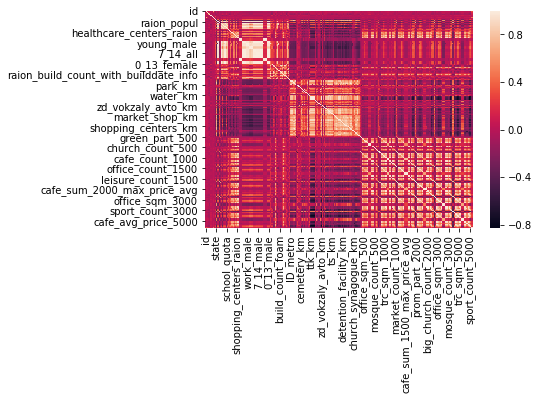

In [124]:
%%time
sns.heatmap(df.corr());

In [125]:
df.shape

(30471, 244)

In [126]:
df['timestamp'].head()

0    2011-08-20
1    2011-08-23
2    2011-08-27
3    2011-09-01
4    2011-09-05
Name: timestamp, dtype: object

In [127]:
df['timestamp'] = pd.to_datetime(df['timestamp'])

In [128]:
df['timestamp'].dt.year.value_counts()

2014    13662
2013     7978
2012     4839
2015     3239
2011      753
Name: timestamp, dtype: int64

In [129]:
df['day'] = df['timestamp'].dt.day
df['month'] = df['timestamp'].dt.month
df['year'] = df['timestamp'].dt.year
df.drop(['timestamp'], axis=1, inplace=True)

In [130]:
categorical_columns = [c for c in df.columns if df[c].dtype.name == 'object']
numerical_columns   = [c for c in df.columns if df[c].dtype.name != 'object']

In [131]:
categorical_columns

['product_type',
 'sub_area',
 'culture_objects_top_25',
 'thermal_power_plant_raion',
 'incineration_raion',
 'oil_chemistry_raion',
 'radiation_raion',
 'railroad_terminal_raion',
 'big_market_raion',
 'nuclear_reactor_raion',
 'detention_facility_raion',
 'water_1line',
 'big_road1_1line',
 'railroad_1line',
 'ecology']

In [132]:
df[numerical_columns] = df[numerical_columns].fillna(df[numerical_columns].median(axis=0), axis=0)

In [133]:
max(df.shape[0] - df.count(axis=0))

0

In [134]:
for col in categorical_columns:
    df[col] = df[col].map(dict(zip(pd.unique(df[col]), np.arange(df[col].unique().shape[0]))))

In [135]:
df[categorical_columns].head()

,product_type,sub_area,culture_objects_top_25,thermal_power_plant_raion,incineration_raion,oil_chemistry_raion,radiation_raion,railroad_terminal_raion,big_market_raion,nuclear_reactor_raion,detention_facility_raion,water_1line,big_road1_1line,railroad_1line,ecology
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1
2,0,2,0,0,0,0,1,0,0,0,0,0,0,0,2
3,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,4,0,0,0,0,1,1,0,0,0,0,0,1,1


## Модель

In [136]:
x, y = df.drop('price_doc', axis=1), df['price_doc']
x_train, x_valid, y_train, y_valid = train_test_split(x.values, y.values, test_size=0.3, random_state=20)

In [137]:
def rmsle(predicted, actual, size): 
    return np.sqrt(np.nansum(np.square(np.log(predicted + 1) - np.log(actual + 1)))/float(size)) 

In [138]:
%%time
boost = GradientBoostingRegressor()
boost.fit(x_train, y_train)

Wall time: 35.8 s


In [139]:
met_name = ['mse', 'sqrt_mse', 'rmsle', 'r2']
met = []

met.append(mean_squared_error(y_valid, boost.predict(x_valid)))
met.append(np.sqrt(mean_squared_error(y_valid, boost.predict(x_valid))))
met.append(rmsle(y_valid, boost.predict(x_valid), y_valid.shape[0]))
met.append(r2_score(y_valid, boost.predict(x_valid)))

pd.DataFrame(np.array([met]).reshape(4, 1), met_name, columns=['Boost'])

,Boost
mse,6.961839e+12
sqrt_mse,2.638530e+06
rmsle,4.821133e-01
r2,6.991743e-01


In [141]:
%%time
boost = GradientBoostingRegressor(n_estimators=200, max_depth=5)
boost.fit(x_train, y_train)

Wall time: 2min 8s


In [142]:
met_name = ['mse', 'sqrt_mse', 'rmsle', 'r2']
met = []


met.append(mean_squared_error(y_valid, boost.predict(x_valid)))
met.append(np.sqrt(mean_squared_error(y_valid, boost.predict(x_valid))))
met.append(rmsle(y_valid, boost.predict(x_valid), y_valid.shape[0]))
met.append(r2_score(y_valid, boost.predict(x_valid)))

pd.DataFrame(np.array([met]).reshape(4, 1), met_name, columns=['Boost'])

D:\Users\Ivan\Documents\Python\Anaconda\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in log
  


,Boost
mse,6.568066e+12
sqrt_mse,2.562824e+06
rmsle,4.748837e-01
r2,7.161895e-01


In [143]:
from sklearn.model_selection import GridSearchCV

In [144]:
tree_params = {'n_estimators': [155, 160]}
grid = GridSearchCV(boost, tree_params, n_jobs=-1)

In [146]:
%%time
grid.fit(x_train, y_train)

Wall time: 7min 12s


GridSearchCV(cv=None, error_score='raise',
       estimator=GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=5, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=200, presort='auto', random_state=None,
             subsample=1.0, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'n_estimators': [160, 165]}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score='warn', scoring=None, verbose=0)

In [147]:
grid.best_params_

{'n_estimators': 165}

In [148]:
grid.best_score_, np.sqrt(grid.best_score_)

(0.678580640887634, 0.8237600626927929)

In [149]:
met_name = ['mse', 'sqrt_mse', 'rmsle', 'r2']
met = []


met.append(mean_squared_error(y_valid, grid.predict(x_valid)))
met.append(np.sqrt(mean_squared_error(y_valid, grid.predict(x_valid))))
met.append(rmsle(y_valid, grid.predict(x_valid), y_valid.shape[0]))
met.append(r2_score(y_valid, grid.predict(x_valid)))

pd.DataFrame(np.array([met]).reshape(4, 1), met_name, columns=['Boost'])

D:\Users\Ivan\Documents\Python\Anaconda\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in log
  


,Boost
mse,6.525845e+12
sqrt_mse,2.554573e+06
rmsle,4.745797e-01
r2,7.180139e-01
